In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
import copy
import phik
from phik.report import plot_correlation_matrix
from phik import report

# Устанавливаем библиотеки 

In [5]:
df = pd.read_csv(("/Work/Open.ru/test_case_file.csv"),encoding='cp1251',sep=';')
df.head()
# Открываем и смотрим данные

,НОМЕР_ЗАЯВКИ,GROUP_2,ЗАЯВКА,СОГЛАСИЕ,ЭМИССИЯ,ТРАНЗАКЦИЯ,ВЫДАЧА,IND_POS,ДАТА_ЗАЯВКИ,ДАТА_ЭМИССИИ,ДАТА_ТРАНЗАКЦИИ,ДАТА_ВЫДАЧИ,ДАТА_POS
0,1,Партнёрский трафик,1,1,1,0,0,0,11.09.2019,12.09.2019,NaN,NaN,NaN
1,2,Партнёрский трафик,1,0,0,0,0,0,12.09.2019,NaN,NaN,NaN,NaN
2,3,Партнёрский трафик,1,1,1,0,0,0,11.09.2019,11.09.2019,NaN,NaN,NaN
3,4,Партнёрский трафик,1,1,1,1,1,1,12.09.2019,12.09.2019,21.09.2019,21.09.2019,21.09.2019
4,5,Партнёрский трафик,1,1,1,0,0,0,11.09.2019,12.09.2019,NaN,NaN,NaN


In [6]:
df.isnull().sum() # Кол-во пропусков

НОМЕР_ЗАЯВКИ           0
GROUP_2                0
ЗАЯВКА                 0
СОГЛАСИЕ               0
ЭМИССИЯ                0
ТРАНЗАКЦИЯ             0
ВЫДАЧА                 0
IND_POS                0
ДАТА_ЗАЯВКИ            0
ДАТА_ЭМИССИИ       29515
ДАТА_ТРАНЗАКЦИИ    39119
ДАТА_ВЫДАЧИ        37106
ДАТА_POS           42199
dtype: int64

In [7]:
df.isna().mean() # % пропусков

НОМЕР_ЗАЯВКИ       0.000000
GROUP_2            0.000000
ЗАЯВКА             0.000000
СОГЛАСИЕ           0.000000
ЭМИССИЯ            0.000000
ТРАНЗАКЦИЯ         0.000000
ВЫДАЧА             0.000000
IND_POS            0.000000
ДАТА_ЗАЯВКИ        0.000000
ДАТА_ЭМИССИИ       0.554699
ДАТА_ТРАНЗАКЦИИ    0.735195
ДАТА_ВЫДАЧИ        0.697363
ДАТА_POS           0.793080
dtype: float64

In [8]:
df.columns

Index(['НОМЕР_ЗАЯВКИ', 'GROUP_2', 'ЗАЯВКА', 'СОГЛАСИЕ', 'ЭМИССИЯ',
       'ТРАНЗАКЦИЯ', 'ВЫДАЧА', 'IND_POS', 'ДАТА_ЗАЯВКИ', 'ДАТА_ЭМИССИИ',
       'ДАТА_ТРАНЗАКЦИИ', 'ДАТА_ВЫДАЧИ', 'ДАТА_POS'],
      dtype='object')

#### Сравним основные метрики с выдачей

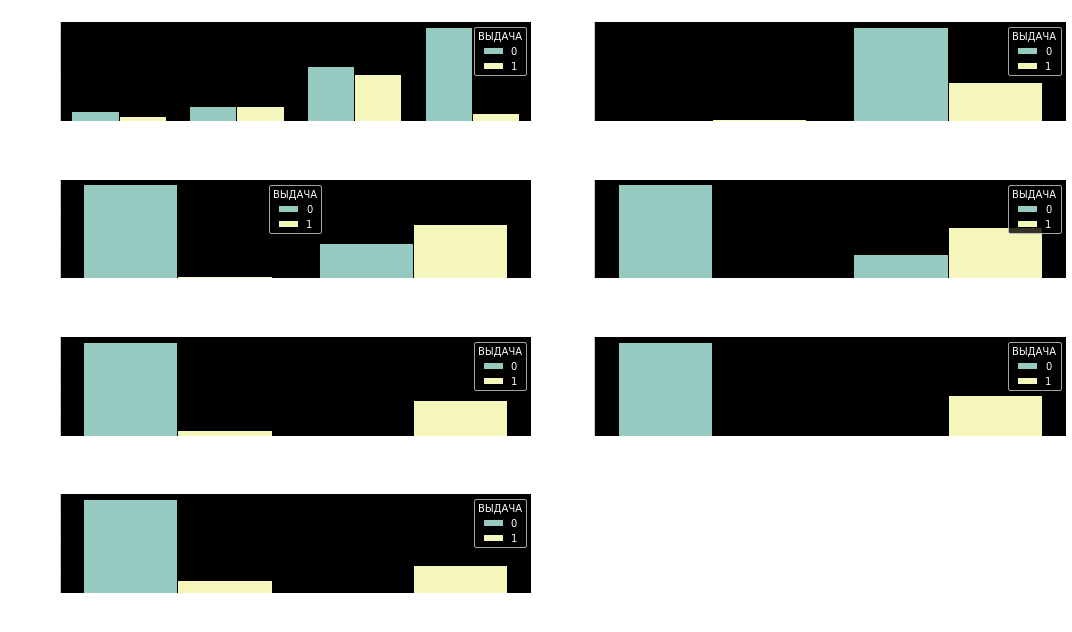

In [9]:

plt.figure(figsize=[15,15])
fft=["GROUP_2","ЗАЯВКА","СОГЛАСИЕ","ЭМИССИЯ", "ТРАНЗАКЦИЯ","ВЫДАЧА", "IND_POS"]
n=1
for f in fft:
    plt.subplot(7,2,n)
    sns.countplot(x=f, hue='ВЫДАЧА', edgecolor="black", alpha=1, data=df)
    sns.despine()
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()


#### Видим аномалию по выдачам через мобильный банк

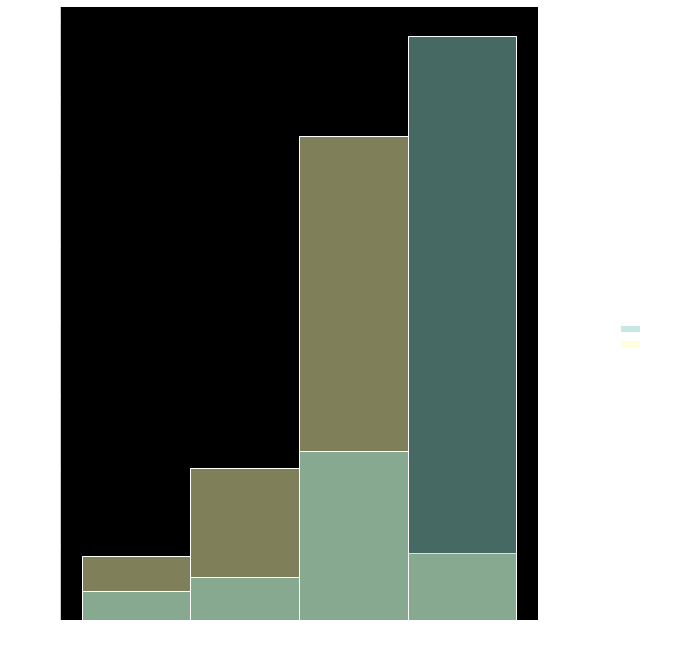

In [15]:
mobile_bank = sns.displot(x='GROUP_2',hue='СОГЛАСИЕ',data=df)
mobile_bank.fig.set_size_inches(10,10) 

#### Проверяем согласия, так как по отчету Power BI сильный провал воронки идет на этапе "согласия"

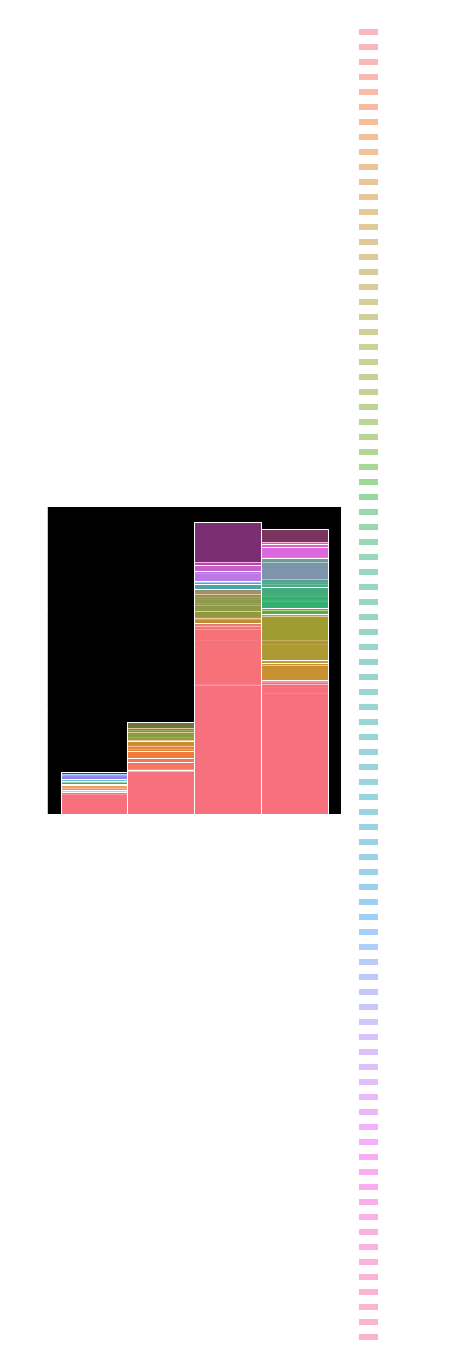

In [13]:
sns.displot(x ='GROUP_2',hue='ДАТА_ЗАЯВКИ',data =df)

#### Видим большую долю октября в заявках через мобильный банк относительно других источников 

In [16]:
phik_overview=df.phik_matrix()

interval columns not set, guessing: ['НОМЕР_ЗАЯВКИ', 'ЗАЯВКА', 'СОГЛАСИЕ', 'ЭМИССИЯ', 'ТРАНЗАКЦИЯ', 'ВЫДАЧА', 'IND_POS']


#### Строим корреляционную матрицу 

In [23]:
phik_overview['СОГЛАСИЕ'].sort_values(ascending=False)

СОГЛАСИЕ           1.000000
ЭМИССИЯ            0.979836
ВЫДАЧА             0.837608
GROUP_2            0.836866
ТРАНЗАКЦИЯ         0.788954
НОМЕР_ЗАЯВКИ       0.719142
IND_POS            0.709289
ДАТА_ЭМИССИИ       0.298614
ДАТА_ЗАЯВКИ        0.240835
ЗАЯВКА             0.198584
ДАТА_ВЫДАЧИ        0.060042
ДАТА_ТРАНЗАКЦИИ    0.058249
ДАТА_POS           0.000000
Name: СОГЛАСИЕ, dtype: float64

<AxesSubplot:>

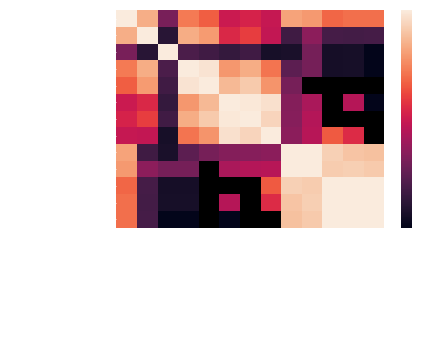

In [19]:
sns.heatmap(phik_overview)

### Итоговые выводы см. в файле EDA_results.txt